# Urban Air Pollution Challenge : Group 28

In [3]:
# Import needed librairies
libraries <- c("data.table","rpart","randomForest", "e1071","keras", "ggplot2", "dummy","corrplot","caret","tensorflow")


In [4]:
for (lib in libraries) {
  if (!require(lib, character.only = TRUE)) {
    install.packages(lib)
    library(lib, character.only = TRUE)
  }
}


Loading required package: data.table

Loading required package: rpart

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: e1071

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘e1071’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Loading required package: keras

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘keras’”
Install

In [4]:
# Set seed for reproducibility
set.seed(3)

In [10]:
# Load data
training_data <- read.csv("Train.csv",  stringsAsFactors=T,)
testing_data <- read.csv("Test.csv",  stringsAsFactors=T)
submission <- read.csv("SampleSubmission.csv")

# 1.1 Data Overview and preprocessing

In [11]:
# Overview of datasets dimensions
dim(training_data)
dim(testing_data)

[1] 4284   82

[1] 4454   77

The training dataset contains 30557 rows (samples) and 82 variables (81 features and 1 target variable). The testing dataset not contains rouglhy 2 times less samples (16136 rows) and has less variables (does not contains the target variable and certains features).

In [12]:
options(repr.matrix.max.cols=90)  # Controls the maximum number of columns displayed when printing dataframes
# Overview of datasets (printing only the first 3 samples for simplicity)
training_data[1:3,]

,Place_ID.X.Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,010Q650 X 2020-01-02,2020-01-02,010Q650,38,23,53,769.50,92,11.0,60.2,0.00804,18.51684,1.996377,-1.227395,7.383038e-05,0.0001558203,-1.231330,0.006506796,840209.9,76.53751,38.63428,-61.73672,22.35817,5.679268e-05,6156.074,1.703769e-05,0.1190949,234.1511,0.00000000,76.53643,38.59302,-61.75259,22.36366,0.02108025,883.3325,267.01718,840138.5,74.54339,38.62245,-61.78902,22.37905,-1.041264e-05,0.00000000,76.53643,38.59302,-61.75259,22.36366,0.0000638880,0.5668279,NA,NA,0.00000000,NA,NA,NA,76.53643,38.59302,-61.75259,22.36366,NA,-1.231330,840209.9,76.53751,38.63428,-61.73672,22.35817,-0.0001268545,0.3125208,-4.046582e-05,-1.861476,0.00000000,76.53643,38.59302,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,010Q650 X 2020-01-03,2020-01-03,010Q650,39,25,63,1319.85,91,14.6,48.8,0.00839,22.54653,3.330430,-1.188108,7.603261e-05,0.0001968663,-1.082553,0.018360030,840772.9,-14.70804,59.62491,-67.69351,28.61480,5.465114e-05,6156.074,2.138147e-05,0.1151788,233.3137,0.05943286,-14.70804,59.62491,-67.69351,28.61480,0.02201668,1148.9854,61.21669,841116.8,-57.01520,61.40263,-74.45758,33.08949,1.144485e-04,0.05943286,-14.70804,59.62491,-67.69351,28.61480,0.0001709871,

In [13]:
testing_data[1:3,]

,Place_ID.X.Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.6,30.2,0.00409,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,835670.5,68.09937,1.445658,-95.98498,22.94202,4.590643e-05,6156.074,7.475449e-06,0.1133104,227.4675,0.032070799,68.09937,1.445658,-95.98498,22.94202,0.01795314,841.1429,155.9830,835625.8,32.70971,1.898112,-95.98702,22.95015,7.301102e-05,0.032070799,68.09937,1.445658,-95.98498,22.94202,8.825694e-05,1.494039,2592.634,74028.43,0.032268417,6.317523,2593.137,74023.93,68.09937,1.445658,-95.98498,22.94202,0.2990532,0.4661731,835670.5,68.09937,1.445658,-95.98498,22.94202,2.207098e-04,0.7844364,1.835919e-04,-0.1404579,0.032070799,68.09937,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.3,42.9,0.00595,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,835281.9,75.93684,34.638933,-95.01798,18.53952,4.507089e-05,7311.869,5.300358e-06,0.1103971,227.7887,0.044783526,75.93684,34.639165,-95.01760,18.53949,0.01957558,1187.5703,922.3858,835225.3,73.80814,34.720869,-95.01710,18.54855,4.839346e-05,0.040803427,75.93681,34.641758,-95.01491,18.53912,7.446204e-05,1.534485,7334.601,48466.65,0.046211274,8.308433,7902.938,46345.61,75.93684,34.639165,-95.01760,18.53949,0.2903967,-0.2136568,835281.9,

In [14]:
summary(training_data)

             Place_ID.X.Date         Date         Place_ID        target      
 010Q650 X 2020-01-02:   1   2020-02-11:  47   010Q650:  94   Min.   :  1.00  
 010Q650 X 2020-01-03:   1   2020-02-19:  47   0DPWHX8:  94   1st Qu.: 28.00  
 010Q650 X 2020-01-04:   1   2020-02-20:  47   0GBXTHY:  94   Median : 52.50  
 010Q650 X 2020-01-05:   1   2020-02-21:  47   0HYPV1N:  94   Mean   : 60.69  
 010Q650 X 2020-01-06:   1   2020-02-22:  47   0KV6RJ1:  94   3rd Qu.: 81.00  
 010Q650 X 2020-01-07:   1   2020-02-23:  47   0MGEY68:  94   Max.   :306.00  
 (Other)             :4278   (Other)   :4002   (Other):3720                   
   target_min       target_max    target_variance   target_count  
 Min.   :  1.00   Min.   :  1.0   Min.   :     0   Min.   :  2.0  
 1st Qu.:  5.00   1st Qu.: 64.0   1st Qu.:  1300   1st Qu.: 35.0  
 Median : 17.00   Median : 97.0   Median :  2612   Median : 72.0  
 Mean   : 28.76   Mean   :112.9   Mean   :  5455   Mean   :134.4  
 3rd Qu.: 46.00   3rd Qu.:155.0  

# 1.1.1 Preprocessing  categorical variables

The variables are of different types : categorical (factors), floatting (fct) or integer (int).

The type of input variables are the following

In [15]:
sapply(training_data[1,],class)

Place_ID.X.Date 
                                           "factor" 
                                               Date 
                                           "factor" 
                                           Place_ID 
                                           "factor" 
                                             target 
                                          "numeric" 
                                         target_min 
                                          "numeric" 
                                         target_max 
                                          "numeric" 
                                    target_variance 
                                          "numeric" 
                                       target_count 
                                          "integer" 
               precipitable_water_entire_atmosphere 
                                          "numeric" 
                  relative_humidity_2m_above_ground 
                                          "numeric" 
                  specific_humidity_2m_above_ground 
                                          "numeric" 
                        temperature_2m_above_ground 
                                          "numeric" 
               u_component_of_wind_10m_above_ground 
                                          "numeric" 
               v_component_of_wind_10m_above_ground 
                                          "numeric" 
                   L3_NO2_NO2_column_number_density 
                                          "numeric" 
             L3_NO2_NO2_slant_column_number_density 
                                          "numeric" 
                     L3_NO2_absorbing_aerosol_index 
                                          "numeric" 
                              L3_NO2_cloud_fraction 
                                          "numeric" 
                             L3_NO2_sensor_altitude 
                                          "numeric" 
                        L3_NO2_sensor_azimuth_angle 
                                          "numeric" 
                         L3_NO2_sensor_zenith_angle 
                                          "numeric" 
                         L3_NO2_solar_azimuth_angle 
                                          "numeric" 
                          L3_NO2_solar_zenith_angle 
                                          "numeric" 
     L3_NO2_stratospheric_NO2_column_number_density 
                                          "numeric" 
                         L3_NO2_tropopause_pressure 
                                          "numeric" 
      L3_NO2_tropospheric_NO2_column_number_density 
                                          "numeric" 
                     L3_O3_O3_column_number_density 
                                          "numeric" 
                     L3_O3_O3_effective_temperature 
                                          "numeric" 
                               L3_O3_cloud_fraction 
                                          "numeric" 
                         L3_O3_sensor_azimuth_angle 
                                          "numeric" 
                          L3_O3_sensor_zenith_angle 
                                          "numeric" 
                          L3_O3_solar_azimuth_angle 
                                          "numeric" 
                           L3_O3_solar_zenith_angle 
                                          "numeric" 
                     L3_CO_CO_column_number_density 
                                          "numeric" 
                    L3_CO_H2O_column_number_density 
                                          "numeric" 
                                 L3_CO_cloud_height 
                                          "numeric" 
                              L3_CO_sensor_altitude 
                                          "numeric" 
                         L3_CO_sensor_azimuth_angle 
                                          "numeric" 
        

As there are categorical variables, we need to transform them in 'one-hot-encoding' in order to allow them to be processed by a learning algorithm. For each value of the categorical variable, we create a binary feature, which is set to one whenever that value is present.

In [16]:
# Get indices of factor variables
factor_variables<-which(sapply(training_data[1,],class)=="factor")
factor_variables

Place_ID.X.Date            Date        Place_ID 
              1               2               3

In [17]:
data_factor<-training_data[,factor_variables]
dim(data_factor)

[1] 4284    3

# Remove redundant variable

In [18]:
# Overview of their content
data_factor[1:2,]
# Update the variable factor_variables
factor_variables<-which(sapply(training_data[1,],class)=="factor")

,Place_ID.X.Date,Date,Place_ID
,<fct>,<fct>,<fct>
1,010Q650 X 2020-01-02,2020-01-02,010Q650
2,010Q650 X 2020-01-03,2020-01-03,010Q650


As PLACE_ID.X.Date is a combination of Date and Place_ID and therefore provides no additional information, we remove it.

In [19]:
training_data<- subset(training_data, select = -Place_ID.X.Date)
training_data[1:2,]

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,010Q650,38,23,53,769.50,92,11.0,60.2,0.00804,18.51684,1.996377,-1.227395,7.383038e-05,0.0001558203,-1.231330,0.006506796,840209.9,76.53751,38.63428,-61.73672,22.35817,5.679268e-05,6156.074,1.703769e-05,0.1190949,234.1511,0.00000000,76.53643,38.59302,-61.75259,22.36366,0.02108025,883.3325,267.01718,840138.5,74.54339,38.62245,-61.78902,22.37905,-1.041264e-05,0.00000000,76.53643,38.59302,-61.75259,22.36366,0.0000638880,0.5668279,NA,NA,0.00000000,NA,NA,NA,76.53643,38.59302,-61.75259,22.36366,NA,-1.231330,840209.9,76.53751,38.63428,-61.73672,22.35817,-0.0001268545,0.3125208,-4.046582e-05,-1.861476,0.00000000,76.53643,38.59302,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,2020-01-03,010Q650,39,25,63,1319.85,91,14.6,48.8,0.00839,22.54653,3.330430,-1.188108,7.603261e-05,0.0001968663,-1.082553,0.018360030,840772.9,-14.70804,59.62491,-67.69351,28.61480,5.465114e-05,6156.074,2.138147e-05,0.1151788,233.3137,0.05943286,-14.70804,59.62491,-67.69351,28.61480,0.02201668,1148.9854,61.21669,841116.8,-57.01520,61.40263,-74.45758,33.08949,1.144485e-04,0.05943286,-14.70804,59.62491,-67.69351,28.61480,0.0001709871,0.8584464,175.0199,99354.16,0.05935814,5.958538,175.0721,99353.6

In [20]:
testing_data<- subset(testing_data, select = -Place_ID.X.Date)
testing_data[1:2,]

,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,0OS9LVX,11.6,30.2,0.00409,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,835670.5,68.09937,1.445658,-95.98498,22.94202,4.590643e-05,6156.074,7.475449e-06,0.1133104,227.4675,0.03207080,68.09937,1.445658,-95.98498,22.94202,0.01795314,841.1429,155.9830,835625.8,32.70971,1.898112,-95.98702,22.95015,7.301102e-05,0.03207080,68.09937,1.445658,-95.98498,22.94202,8.825694e-05,1.494039,2592.634,74028.43,0.03226842,6.317523,2593.137,74023.93,68.09937,1.445658,-95.98498,22.94202,0.2990532,0.4661731,835670.5,68.09937,1.445658,-95.98498,22.94202,2.207098e-04,0.7844364,1.835919e-04,-0.1404579,0.03207080,68.09937,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,2020-01-03,0OS9LVX,18.3,42.9,0.00595,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,835281.9,75.93684,34.638933,-95.01798,18.53952,4.507089e-05,7311.869,5.300358e-06,0.1103971,227.7887,0.04478353,75.93684,34.639165,-95.01760,18.53949,0.01957558,1187.5703,922.3858,835225.3,73.80814,34.720869,-95.01710,18.54855,4.839346e-05,0.04080343,75.93681,34.641758,-95.01491,18.53912,7.446204e-05,1.534485,7334.601,48466.65,0.04621127,8.308433,7902.938,46345.61,75.93684,34.639165,-95.01760,18.53949,0.2903967,-0.2136568,835281.9,75.93684,34.638933,-95.01798,18.53952,3.386942e-05,0.6789883,1.353507e-

# Conversion into "one-hot-encoding"

In [21]:
dummy_vars <- dummyVars(~ Date + Place_ID, data = training_data)
one_hot_encoded.training <- predict(dummy_vars, newdata = training_data)
dim(one_hot_encoded.training)

[1] 4284  142

Overview of the one hot encoded variables

In [22]:
one_hot_encoded.training[1:2,]

,Date.2020-01-02,Date.2020-01-03,Date.2020-01-04,Date.2020-01-05,Date.2020-01-06,Date.2020-01-07,Date.2020-01-08,Date.2020-01-09,Date.2020-01-10,Date.2020-01-11,Date.2020-01-12,Date.2020-01-13,Date.2020-01-14,Date.2020-01-15,Date.2020-01-16,Date.2020-01-17,Date.2020-01-18,Date.2020-01-19,Date.2020-01-20,Date.2020-01-21,Date.2020-01-22,Date.2020-01-23,Date.2020-01-24,Date.2020-01-25,Date.2020-01-26,Date.2020-01-27,Date.2020-01-28,Date.2020-01-29,Date.2020-01-30,Date.2020-01-31,Date.2020-02-01,Date.2020-02-02,Date.2020-02-03,Date.2020-02-04,Date.2020-02-05,Date.2020-02-06,Date.2020-02-07,Date.2020-02-08,Date.2020-02-09,Date.2020-02-10,Date.2020-02-11,Date.2020-02-12,Date.2020-02-13,Date.2020-02-14,Date.2020-02-15,⋯,Place_ID.0GBXTHY,Place_ID.0HYPV1N,Place_ID.0I2XREH,Place_ID.0KV6RJ1,Place_ID.0MGEY68,Place_ID.0O9R6AD,Place_ID.0PP73FZ,Place_ID.0RYZQUU,Place_ID.0TFOCOS,Place_ID.0TLH9UN,Place_ID.11WPGRD,Place_ID.168B2T2,Place_ID.1GZGJPN,Place_ID.1LC5FAK,Place_ID.1PRBF5P,Place_ID.1RYCZPT,Place_ID.1SC5AWD,Place_ID.1SKLTGJ,Place_ID.1TE1HKJ,Place_ID.1UEYEJQ,Place_ID.1VN0K1S,Place_ID.1WD100Y,Place_ID.1X421B8,Place_ID.1Y0S7TZ,Place_ID.1YXF6T3,Place_ID.1Z0FIHB,Place_ID.1ZBVIMD,Place_ID.215BUAP,Place_ID.22D7H7I,Place_ID.238N4KU,Place_ID.28OSFYU,Place_ID.2JZW8ZM,Place_ID.2OR3E6X,Place_ID.2S8UY1N,Place_ID.2T41T7C,Place_ID.2USU80I,Place_ID.2WABRKJ,Place_ID.35YN53B,Place_ID.37VXILV,Place_ID.3EJ33BJ,Place_ID.3H1DEPM,Place_ID.3HTVI1M,Place_ID.3MXSVYJ,Place_ID.3V177MC,Place_ID.3WZQJU8
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Therefore, we add these one-hot encoded variables and delete the two factors variables

In [23]:
training_data <- subset(training_data, select = -Date)
training_data <- subset(training_data, select = -Place_ID)
training_data[1:3,]

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,23,53,769.50,92,11.0,60.2,0.00804,18.51684,1.996377,-1.227395,7.383038e-05,0.0001558203,-1.231330,0.006506796,840209.9,76.53751,38.63428,-61.73672,22.35817,5.679268e-05,6156.074,1.703769e-05,0.1190949,234.1511,0.00000000,76.53643,38.59302,-61.75259,22.36366,0.02108025,883.3325,267.01718,840138.5,74.54339,38.62245,-61.78902,22.37905,-1.041264e-05,0.00000000,76.53643,38.59302,-61.75259,22.36366,0.0000638880,0.5668279,NA,NA,0.00000000,NA,NA,NA,76.53643,38.59302,-61.75259,22.36366,NA,-1.231330,840209.9,76.53751,38.63428,-61.73672,22.35817,-0.0001268545,0.3125208,-4.046582e-05,-1.861476,0.00000000,76.53643,38.59302,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,39,25,63,1319.85,91,14.6,48.8,0.00839,22.54653,3.330430,-1.188108,7.603261e-05,0.0001968663,-1.082553,0.018360030,840772.9,-14.70804,59.62491,-67.69351,28.61480,5.465114e-05,6156.074,2.138147e-05,0.1151788,233.3137,0.05943286,-14.70804,59.62491,-67.69351,28.61480,0.02201668,1148.9854,61.21669,841116.8,-57.01520,61.40263,-74.45758,33.08949,1.144485e-04,0.05943286,-14.70804,59.62491,-67.69351,28.61480,0.0001709871,0.8584464,175.0199,99354.16,0.05935814,5.958538,175.0721,99353.67,-14.70804,59.62491,-67.69351,28.61480,0.3154027,-1.082553,8407

We do the same procedure for the test dataset

In [24]:
dummy_vars <- dummyVars(~ Date + Place_ID, data = testing_data)
one_hot_encoded.testing <- predict(dummy_vars, newdata = testing_data)
testing_data <- subset(testing_data, select = -Date)
testing_data <- subset(testing_data, select = -Place_ID)
testing_data[1:3,]

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.6,30.2,0.00409,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,835670.5,68.09937,1.445658,-95.98498,22.94202,4.590643e-05,6156.074,7.475449e-06,0.1133104,227.4675,0.032070799,68.09937,1.445658,-95.98498,22.94202,0.01795314,841.1429,155.9830,835625.8,32.70971,1.898112,-95.98702,22.95015,7.301102e-05,0.032070799,68.09937,1.445658,-95.98498,22.94202,8.825694e-05,1.494039,2592.634,74028.43,0.032268417,6.317523,2593.137,74023.93,68.09937,1.445658,-95.98498,22.94202,0.2990532,0.4661731,835670.5,68.09937,1.445658,-95.98498,22.94202,2.207098e-04,0.7844364,1.835919e-04,-0.1404579,0.032070799,68.09937,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,18.3,42.9,0.00595,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,835281.9,75.93684,34.638933,-95.01798,18.53952,4.507089e-05,7311.869,5.300358e-06,0.1103971,227.7887,0.044783526,75.93684,34.639165,-95.01760,18.53949,0.01957558,1187.5703,922.3858,835225.3,73.80814,34.720869,-95.01710,18.54855,4.839346e-05,0.040803427,75.93681,34.641758,-95.01491,18.53912,7.446204e-05,1.534485,7334.601,48466.65,0.046211274,8.308433,7902.938,46345.61,75.93684,34.639165,-95.01760,18.53949,0.2903967,-0.2136568,835281.9,75.93684,34.638933,-95.01798,18.53952,3.386942e-05,0.6789883,1.353507e-05,-0.8427128,0.040803427,75.93681,34.641758,-95.01491,18

# Replace NA values with mean values

Before adding the one-hot variables into the training data, we remove the NA values with mean values. The rationale behind this choice is that the mean values does not change the data distribution and is computationally efficient.

In [25]:
sum(is.na(training_data))

[1] 52863

In [26]:
sum(is.na(testing_data))

[1] 59994

In [27]:
# Function that replace NA values with mean values
replace_na_with_mean_value<-function(vec) {
    mean_vec<-mean(vec,na.rm=T)
    vec[is.na(vec)]<-mean_vec
    vec
}


In [28]:
# We apply the function on each column of the training data
training_data<-data.frame(apply(training_data,2,replace_na_with_mean_value))
# Equivalently for the testing data
testing_data <- data.frame(apply(testing_data,2,replace_na_with_mean_value))

After replacing the missing values, by the mean value of the feature

In [29]:
sum(is.na(training_data))

[1] 0

Equivalently for the testing data

In [30]:
sum(is.na(testing_data))

[1] 0

As we can see the number of NA values is 0. Therefore, there are no missing values in training data.

# Add one-hot encoding variables to the training data

After removing missing values, we add the one-hot encoded variables.

In [31]:
training_data<-cbind(training_data,one_hot_encoded.training)
testing_data<-cbind(testing_data,one_hot_encoded.testing)
dim(training_data)
dim(testing_data)

[1] 4284  221

[1] 4454  218

We see that the number of features increases strongly by using one-hot encodage


In [32]:
X<-training_data[,setdiff(colnames(training_data),"target")]
Y<-training_data[,"target"]
# Rename new variables introduced
colnames(X) <- gsub(colnames(X),pattern = " ", replacement = "_")
colnames(X) <- gsub(colnames(X),pattern = "-", replacement = "_")
N<-nrow(X)    #Number of examples
n<-ncol(X)    #Number of input variables
N
n


[1] 4284

[1] 220

We can see by the number of columns (variables) that the target variable has been removed in the dataframe X.

In [33]:
summary(X)

   target_min       target_max    target_variance   target_count  
 Min.   :  1.00   Min.   :  1.0   Min.   :     0   Min.   :  2.0  
 1st Qu.:  5.00   1st Qu.: 64.0   1st Qu.:  1300   1st Qu.: 35.0  
 Median : 17.00   Median : 97.0   Median :  2612   Median : 72.0  
 Mean   : 28.76   Mean   :112.9   Mean   :  5455   Mean   :134.4  
 3rd Qu.: 46.00   3rd Qu.:155.0   3rd Qu.:  5464   3rd Qu.:146.2  
 Max.   :183.00   Max.   :824.0   Max.   :596414   Max.   :790.0  
 precipitable_water_entire_atmosphere relative_humidity_2m_above_ground
 Min.   : 1.25                        Min.   :  9.30                   
 1st Qu.: 9.00                        1st Qu.: 59.96                   
 Median :14.50                        Median : 74.20                   
 Mean   :17.69                        Mean   : 70.67                   
 3rd Qu.:23.10                        3rd Qu.: 84.00                   
 Max.   :72.60                        Max.   :100.00                   
 specific_humidity_2m_above

# Normalization

As the features have different scales, normalization is neededed to scale numerical features to a standard range. That ensures that they contribute equally to the analysis. The kind of normalization that we use is the Min-Max normalization which scales the data between a certain range of values.
For each value X, we compute the normalized value as follow
$$
X_{normalized} = \frac{X-X_{min}}{X_{max} - X_{min}}
$$


Although a model *might* converge without feature normalization, normalization makes training much more stable. Note: There is no advantage to normalizing the one-hot features, it is done here for simplicity.


To illustrate, we analyze the range of two selected variables

In [34]:
# Min-Max normalization function
min_max_normalize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

In [35]:
testing_data <- as.data.frame(lapply(testing_data, min_max_normalize)) # Apply the normalization function to all the training data
testing_data[1:3,]

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,⋯,Place_ID.1JJE0UY,Place_ID.1PILPB3,Place_ID.1WV2OIN,Place_ID.27N3G71,Place_ID.2DIIB3S,Place_ID.33H2WX0,Place_ID.4B4QSFT,Place_ID.4DOKYIS,Place_ID.4KBBZUA,Place_ID.4Y8QUA3,Place_ID.5PXQINB,Place_ID.5RGROX5,Place_ID.63PPI0D,Place_ID.68WXEMV,Place_ID.6IHI634,Place_ID.6L6T45C,Place_ID.6Q5AZWX,Place_ID.6UUG3GR,Place_ID.6VP6JSW,Place_ID.7647I73,Place_ID.76RSX1D,Place_ID.7G7AG28,Place_ID.7N5XYRU,Place_ID.7SZW1UF,Place_ID.7SZZTH1,Place_ID.7VQXRXL,Place_ID.8196WE6,Place_ID.8CPKUI4,Place_ID.8D39BT5,Place_ID.8F0DFNG,Place_ID.8RC2FY4,Place_ID.8V3GY99,Place_ID.96AWIMD,Place_ID.9IOQQ4T,Place_ID.9RXF2KR,Place_ID.9VUX9AI,Place_ID.A4Z5WHY,Place_ID.A5Q06QS,Place_ID.B0B69RZ,Place_ID.B0BNTM9,Place_ID.B61EFVW,Place_ID.B6D31F4,Place_ID.BFYKI97,Place_ID.BHDVVZ1,Place_ID.BHHB4KK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1959871,0.1931968,0.2226048,0.6715321,0.5682449,0.4747779,0.06657877,0.08053446,0.4491496,0.01075178,0.9903109,0.9488263,0.0218345,0.2331522,0.2826493,0.6541238,0.1943976,0.04669173,0.5010403,0.9625014,0.032070799,0.9494350,0.02225957,0.2329261,0.2880054,0.1474550,0.09390529,0.1312775,0.9900563,0.7540030,0.02902263,0.2332743,0.2869292,0.4308771,0.05484418,0.9379089,0.0218703,0.2330872,0.2881025,0.3415222,0.6027769,0.1970828,0.6796981,0.032268417,0.02305509,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.3195081,0.3399934,0.3312415,0.6775458,0.5791572,0.4729583,0.06425755,0.08121112,0.3699893,0.02830689,0.9898504,0.9913057,0.5231693,0.2358440,0.2284099,0.6422181,0.2308955,0.04405576,0.4881578,0.9638604,0.044783526,0.9914092,0.53335786,0.2356234,0.2327377,0.1607807,0.13258050,0.2687645,0.9895818,0.9769403,0.53089103,0.2359693,0.2318992,0.4015806,0.06977782,0.9791190,0.5240697,0.2357860,0.2328115,0.3306467,0.6190952,0.5593176,0.3794524,0.046211274,0.03176742,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.3066029,0.3214993,0.3283212,0.6854264,0.6195849,0.5080737,0.06418336,0.10009143,0.3652628,0.01037382,0.9893256,0.9892223,0.8438671,0.2386347,0.1742171,0.6277608,0.1943976,0.04526425,0.4974634,0.9699828,0.0071

In [36]:
X <- as.data.frame(lapply(X, min_max_normalize)) # Apply the normalization function to all the training data
X[1:3,]


,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,⋯,Place_ID.0GBXTHY,Place_ID.0HYPV1N,Place_ID.0I2XREH,Place_ID.0KV6RJ1,Place_ID.0MGEY68,Place_ID.0O9R6AD,Place_ID.0PP73FZ,Place_ID.0RYZQUU,Place_ID.0TFOCOS,Place_ID.0TLH9UN,Place_ID.11WPGRD,Place_ID.168B2T2,Place_ID.1GZGJPN,Place_ID.1LC5FAK,Place_ID.1PRBF5P,Place_ID.1RYCZPT,Place_ID.1SC5AWD,Place_ID.1SKLTGJ,Place_ID.1TE1HKJ,Place_ID.1UEYEJQ,Place_ID.1VN0K1S,Place_ID.1WD100Y,Place_ID.1X421B8,Place_ID.1Y0S7TZ,Place_ID.1YXF6T3,Place_ID.1Z0FIHB,Place_ID.1ZBVIMD,Place_ID.215BUAP,Place_ID.22D7H7I,Place_ID.238N4KU,Place_ID.28OSFYU,Place_ID.2JZW8ZM,Place_ID.2OR3E6X,Place_ID.2S8UY1N,Place_ID.2T41T7C,Place_ID.2USU80I,Place_ID.2WABRKJ,Place_ID.35YN53B,Place_ID.37VXILV,Place_ID.3EJ33BJ,Place_ID.3H1DEPM,Place_ID.3HTVI1M,Place_ID.3MXSVYJ,Place_ID.3V177MC,Place_ID.3WZQJU8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.12087912,0.06318348,0.001290211,0.1142132,0.1366503,0.5611907,0.3607704,0.7449161,0.4849997,0.4398349,0.06205021,0.1597530,0.3195160,0.006506796,0.9979162,0.99522146,0.5833599,0.3287387,0.2756114,0.8910139,0.1948597,0.04672623,0.5341224,0.9882322,0.00000000,0.99523874,0.5846291,0.3269472,0.2811330,0.2289276,0.04493876,0.13210130,0.9976661,0.9897035,0.5906721,0.3282109,0.2805635,0.5202670,0.00000000,0.99495863,0.5846186,0.3278025,0.2810610,0.3056011,0.1828574,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.13186813,0.07533414,0.002212976,0.1129442,0.1871058,0.4355016,0.3772515,0.8132484,0.5326086,0.4413731,0.06339624,0.2018349,0.3447925,0.018360030,0.9985849,0.51220231,0.9003087,0.3121741,0.3527376,0.8574154,0.1948597,0.04982100,0.5165594,0.9846979,0.05943286,0.51333310,0.9032323,0.3102984,0.3597160,0.2390969,0.05845362,0.09435785,0.9988279,0.2664190,0.9390605,0.2929560,0.4148391,0.6379188,0.09871089,0.51318863,0.9032160,0.3112674,0.3596238,0.3843986,0.2769328,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.03846154,0.06682868,0.001981778,0.1192893,0.2123336,0.2657112,0.3353424,0.8892928,0.5945368,0.6249433,0.05763564,0.1747191,0.3586069,0.015903901,0.9993424,0.03316527,0.7525567,0.2825608,0.4227823,0.9276171,0.2314443,0.03991819,0.5196858,0.9801389,0.08206301,0.03

As we can see all the variables are in the range [0, 1]. At this stage, the training data is normalized, the categorical variables were converted into one-hot encoding and the missing values were replaced by the mean values.

# Data distribution

In this part, we focus on the data distribution. In a first time, we focus on the distribution of the target variable.

#  PM2.5 particulate matter concentration distribution

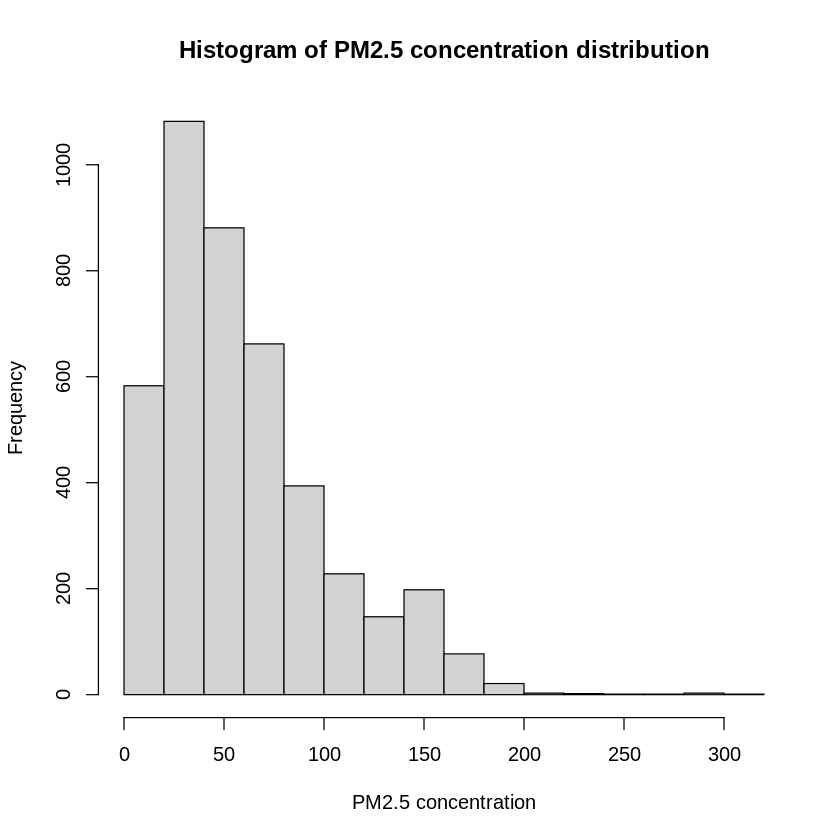

In [37]:
# Histogram of the target variable
hist(Y,
     main = "Histogram of PM2.5 concentration distribution",
     xlab = "PM2.5 concentration",
     ylab = "Frequency")



In [38]:
mean(Y)

[1] 60.68814

In [39]:
var(Y)

[1] 1751.782

In [40]:
# Compute the frequency table for the target variable
frequency_table <- table(Y)
prop_table <- prop.table(frequency_table)
percentage_table <- prop_table * 100
# Overview of the percentage table
percentage_table

Y
         1          2          3          5          6          7          8 
0.02334267 0.04668534 0.04668534 0.25676937 0.09337068 0.35014006 0.65359477 
         9         10         11         12         13         14         15 
0.95704949 0.74696545 0.49019608 0.46685341 1.96078431 0.65359477 0.95704949 
        16         17         18         19         20         21         22 
0.77030812 2.35760971 1.16713352 0.58356676 1.02707750 3.71148459 0.60690943 
        23         24         25         26         27         28         29 
0.77030812 0.60690943 4.59850607 0.46685341 0.42016807 0.58356676 0.49019608 
        30         31         32         33         34         35         36 
3.45471522 0.39682540 0.44351074 0.58356676 3.24463119 0.37348273 0.35014006 
        37         38         39         40         41         42         43 
0.28011204 3.33800187 0.21008403 0.32679739 0.32679739 2.94117647 0.25676937 
        44         45         46         47         48        

Additionally, the density plot of the target variable

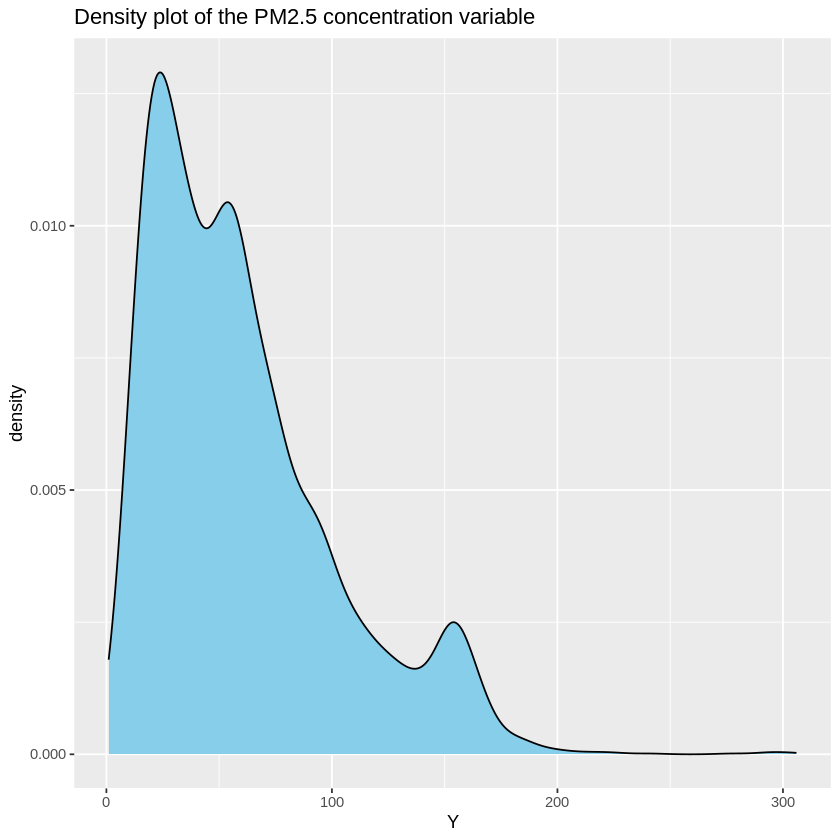

In [41]:
ggplot(training_data, aes(x = Y)) +
  geom_density(fill = "skyblue", color = "black") +
  labs(title = "Density plot of the PM2.5 concentration variable")

From these plots, we can see that the dataset is umbalanced since the distribution is left-skewed. There is a clear peak towards the value 25 for the target variable (since the percentage table indicates the highest frequency value for this value). The distribution of the target variable seems to be consistent since the higher the PM.2 matter concentration is, the lower the frequency is (indicating that higher level of pollution are less frequent).

We also plot the boxplot to visualise potential outliers.

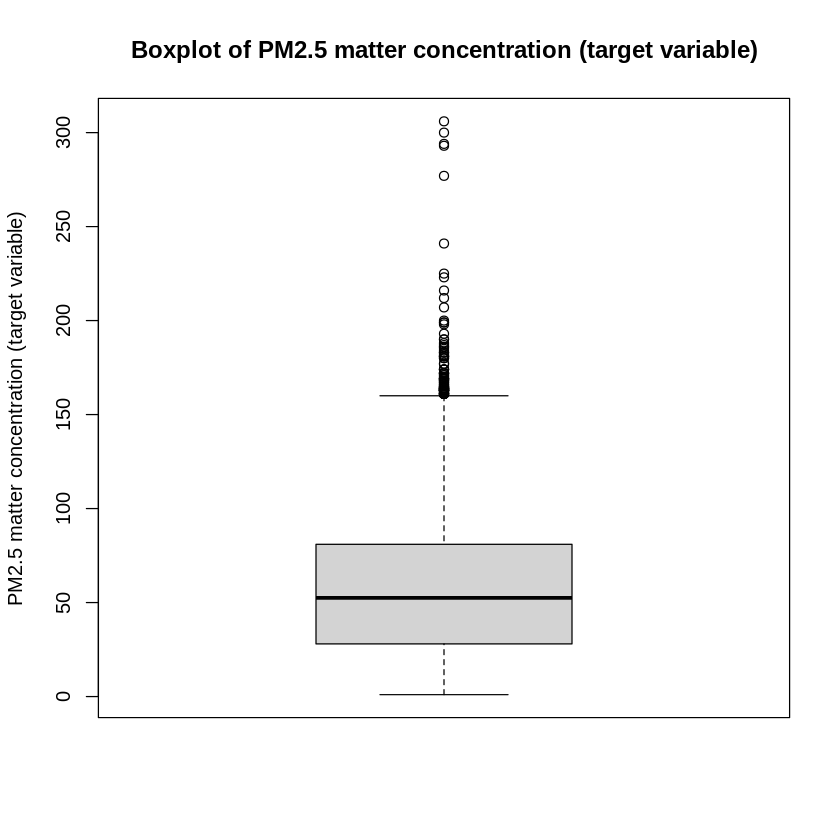

In [42]:
boxplot(Y,
        main = "Boxplot of PM2.5 matter concentration (target variable)",
        ylab = "PM2.5 matter concentration (target variable)")

This boxplot is indicating a strong positive skew and showing a lot of outliers.

# Log Transformation

Applying a log transforation to the target variable which is skewed can help to reduce the skewness and therefore make the distribution more symmetric. Logarithmic transformations compress the range of extreme values and thus reduces the impact of outliers.

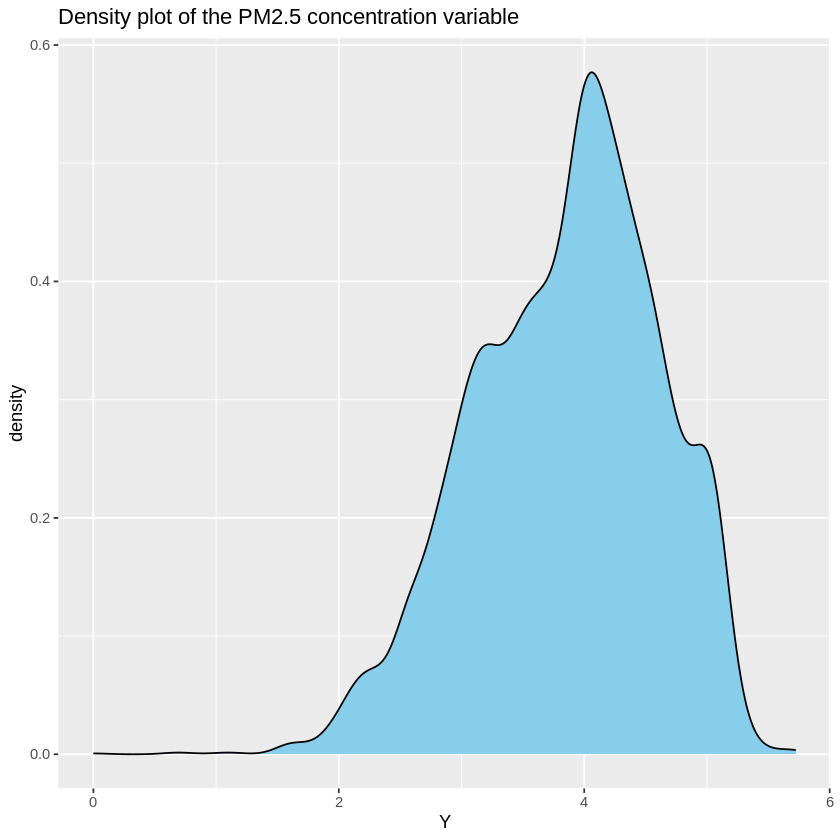

In [43]:
Y <- log(Y) # Log transformation


ggplot(training_data, aes(x = Y)) +
  geom_density(fill = "skyblue", color = "black") +
  labs(title = "Density plot of the PM2.5 concentration variable")



In [44]:
mean(Y)
var(Y)

[1] 3.855059

[1] 0.5595652

We can see that the log transformation has effectively reduced the skewness of the distribution, leading to a more symmetric one.

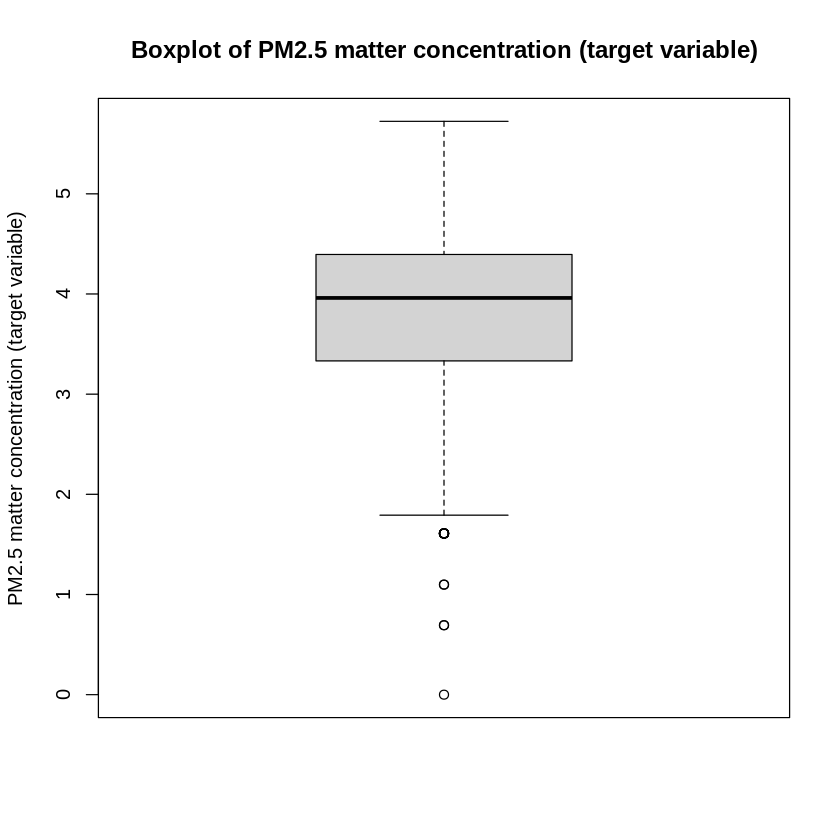

In [45]:
boxplot(Y,
        main = "Boxplot of PM2.5 matter concentration (target variable)",
        ylab = "PM2.5 matter concentration (target variable)")

The boxplot shows less outliers and a symmetric distribution (as demonstrated by the density plot)

# Linear model

Before doing the feature selection process, we create a linear model for predicting the PM2.5 concentration matter on the basis of the feature and compute the root mean squared error as performance metric, defined as follow :

$$ RMSE= \sqrt{ \frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}$$  

The second performance metric is the normalised mean squared error which is defined as follow :
$$ NMSE=  \frac{\sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}{\sum_{i=1}^{N_{ts}} (y_{i} - \bar{y})^2}$$
where
- $N_{ts}$ is the number of test observations,
- $\bar{y}$ = $\frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} y_i$
- $y_{i}$ is the measured concentration of the $i$th test observation,
- $\hat{y_{i}}$  is the predicted concentration of the $i$th  test observation.



The purpose of doing this is to have a first feeling on the potential features that significantly are correlated with the output

In [46]:
DS<-cbind(X,target=Y) # Create a new dataset containing the features and the target column
model<- lm(target~.,DS)
Y_hat<- predict(model,X)
# Inverse-transform the predictions
Y_hat <- exp(Y_hat)
rmse<-sqrt(mean((exp(Y)-Y_hat)^2))
print(paste("RMSE =",round(rmse,digits=4)))

[1] "RMSE = 25.4076"


To have a first overview of which input variables are correlated with the output

In [47]:
summary(model)


Call:
lm(formula = target ~ ., data = DS)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.91289 -0.15586  0.01391  0.17639  1.24535 

Coefficients: (2 not defined because of singularities)
                                                      Estimate Std. Error
(Intercept)                                          4.6588456  1.7133853
target_min                                           1.6739458  0.0529534
target_max                                           2.2551834  0.1118273
target_variance                                     -1.8610383  0.2292971
target_count                                         0.9669685  0.1176715
precipitable_water_entire_atmosphere                -0.2595293  0.0889541
relative_humidity_2m_above_ground                   -0.0119596  0.0694006
specific_humidity_2m_above_ground                    0.0223565  0.1567222
temperature_2m_above_ground                          0.2072159  0.1688027
u_component_of_wind_10m_above_ground                -0.24

All the variables with stars (either *, ** or ***) are impact significantly the target variable (PM2.5 concentration matter). The number of stars indicates the significance level chosen (either 0.05, 0.01 or 0.001). For example, the variable "L3_NO2_NO2_column_number_density" impacts significantly the PM2.5 concentration matter with a significance level of 0.001. With this overview, we can have a feeling about which variables are necessary for the prediction of the target variable.                   

# Relationship between features and the ouput

# Correlation

One way to analyze the relationship between the features and the output is to compute the correlation between the features and the target variable.
Features having strong correlation factor with the target variable means that there is a significant relationship or association between that particular feature and the target variable.

We compute the correlation factors between the features and the target variable and order them in deacreasing order

In [48]:
correlation_vector <-abs(cor(X,Y))
# Rank variables according to correlation with the output variable
correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
selected_column_names <- colnames(X)[correlation_ranking_idx]
# Overview of the 10 most correlated feature with output variable
selected_column_names[1:10]

[1] "target_min"                                     
 [2] "target_max"                                     
 [3] "L3_AER_AI_sensor_altitude"                      
 [4] "L3_CO_CO_column_number_density"                 
 [5] "L3_HCHO_tropospheric_HCHO_column_number_density"
 [6] "L3_HCHO_HCHO_slant_column_number_density"       
 [7] "L3_AER_AI_solar_azimuth_angle"                  
 [8] "L3_CLOUD_solar_azimuth_angle"                   
 [9] "L3_NO2_NO2_column_number_density"               
[10] "Place_ID.1ZBVIMD"

In the next, we will use this correlation factor to do feature selection, using therefore a filter method.

# Relationship between features

Features having strong correlation provide redundant information which introduce unnecessary complexity. Therefore, eliminating such features can streamline model training, reduce overfitting, and enhance efficiency. To analyse the correlation between features, we use a correlaton plot that indicates the correlation factor for each pairs of features. As the number of variables is high (more than 500), we cannot plot the correlation plot of all the variables. Therefore, we plot only the correlation plot of the 50 most features having the highest correlation with the output variable

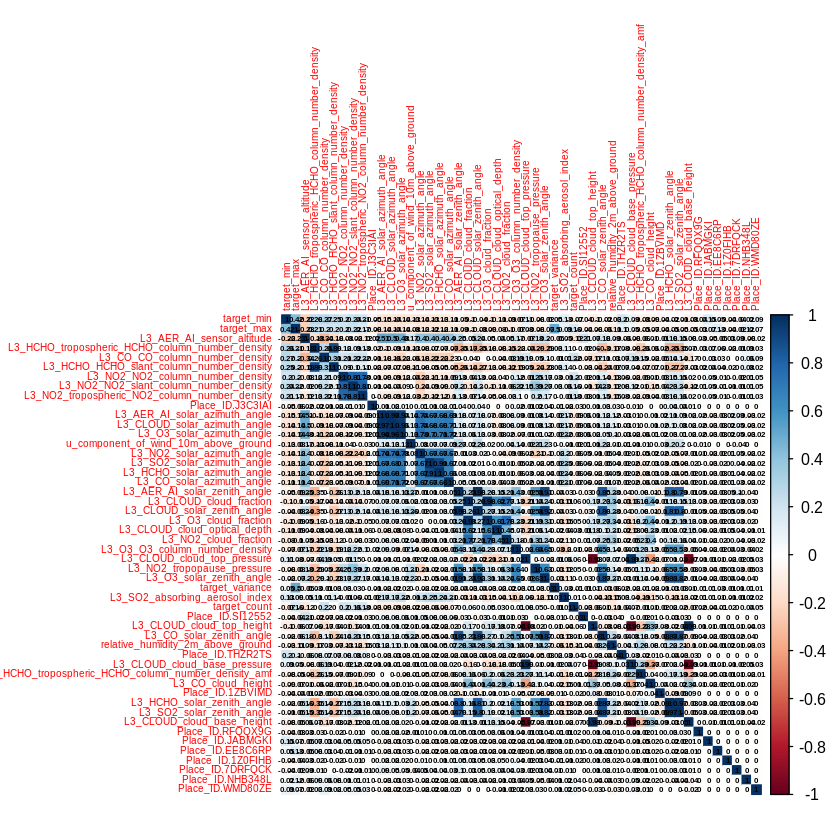

In [43]:
#selected_features <- X[,correlation_ranking_idx]
plot_features <- X[,correlation_ranking_idx[1:50]]
correlations <- cor(plot_features)
corrplot(correlations, method = "color", addCoef.col = "black", number.cex = 0.4, tl.cex = 0.5,number.digits = 2)



As this plot shows, there are a lot of features that are strongly correlated. To avoid overfitting and unnecessary complexity, we need to remove the features that provide no additional information. This shows the necessary of applying a feature selection technique.



# Feature selection

# 1. Correlation  with the output

The objective of this filter method is to keep the most correlated variables with the target variable. To have a better overview of the generalization to useen data of the model, we will use a cross validation with 10 folds (for computational purpose).

In [46]:

# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)
for (i in 1:CV_folds) {
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]


    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix

  for (nb_features in 1:length(correlation_ranking_idx)) {


          # Create a dataset including only the nb_features most correlated variables with the output
          DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],target=Y_tr)

          # Model fit (using lm function)
          model<- lm(target~.,DS)

          # Model prediction
        Y_hat<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        Y_hat <- exp(Y_hat) # Transform the log-prediction into the real prediction (log-transformation)
        CV_err[nb_features,i] <-sqrt(mean((exp(Y_ts)-Y_hat)^2))
  }
}
print(paste("#Features: ",c(1:n)," ; RMSE error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


Warning message in cor(X_tr, Y_tr):
“the standard deviation is zero”
Warning message in predict.lm(model, X_ts[, correlation_ranking_idx[1:nb_features], :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, correlation_ranking_idx[1:nb_features], :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, correlation_ranking_idx[1:nb_features], :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, correlation_ranking_idx[1:nb_features], :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, correlation_ranking_idx[1:nb_features], :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, correlation_ranking_idx[1:nb_features], :
“prediction from rank-def

  [1] "#Features:  1  ; RMSE error= 42.4679  ; std dev= 31.5006"  
  [2] "#Features:  2  ; RMSE error= 64.3985  ; std dev= 52.7309"  
  [3] "#Features:  3  ; RMSE error= 58.0726  ; std dev= 49.5525"  
  [4] "#Features:  4  ; RMSE error= 54.4586  ; std dev= 45.9533"  
  [5] "#Features:  5  ; RMSE error= 52.9077  ; std dev= 44.379"   
  [6] "#Features:  6  ; RMSE error= 52.5328  ; std dev= 43.7888"  
  [7] "#Features:  7  ; RMSE error= 51.8719  ; std dev= 42.4228"  
  [8] "#Features:  8  ; RMSE error= 50.6014  ; std dev= 39.7408"  
  [9] "#Features:  9  ; RMSE error= 49.2603  ; std dev= 39.2448"  
 [10] "#Features:  10  ; RMSE error= 49.2294  ; std dev= 39.4797" 
 [11] "#Features:  11  ; RMSE error= 48.4669  ; std dev= 39.1305" 
 [12] "#Features:  12  ; RMSE error= 48.4316  ; std dev= 39.1767" 
 [13] "#Features:  13  ; RMSE error= 46.6219  ; std dev= 36.5968" 
 [14] "#Features:  14  ; RMSE error= 45.9433  ; std dev= 36.0511" 
 [15] "#Features:  15  ; RMSE error= 45.2068  ; std dev= 35.33

As we can see, by adding the correlated variables (from the most correlated to the least correlated with the target variable), we can see that the performance metric, i.e here we analyses only the RMSE, decreases with the addition of features, indicating that these variables are relevant for predicting the target.

# 2.  mRMR

In [47]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]

    # Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)

    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n

    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))

        if (length(selected)>0) {
            # Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            # Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }

        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score

        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)

        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }

    ranking <- selected

    for (nb_features in 1:length(ranking)) {
        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],target=Y_tr)

        # Model fit (using lm function)
        model<- lm(target~.,DS)

        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        Y_hat_ts<- exp(Y_hat_ts)

        # Cross-validation error = MSE
        CV_err[nb_features,i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
    }
}

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

Warning message in cor(X_tr, Y_tr):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning message in cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F]):
“the standard deviation is zero”
Warning mes

  [1] "#Features:  1  ; CV error= 42.4679  ; std dev= 31.5006"  
  [2] "#Features:  2  ; CV error= 64.3985  ; std dev= 52.7309"  
  [3] "#Features:  3  ; CV error= 56.2671  ; std dev= 45.343"   
  [4] "#Features:  4  ; CV error= 49.1796  ; std dev= 39.6112"  
  [5] "#Features:  5  ; CV error= 46.8348  ; std dev= 36.8678"  
  [6] "#Features:  6  ; CV error= 43.4747  ; std dev= 33.7064"  
  [7] "#Features:  7  ; CV error= 42.1716  ; std dev= 33.1211"  
  [8] "#Features:  8  ; CV error= 40.7564  ; std dev= 30.7336"  
  [9] "#Features:  9  ; CV error= 39.523  ; std dev= 28.5092"   
 [10] "#Features:  10  ; CV error= 38.3704  ; std dev= 26.9918" 
 [11] "#Features:  11  ; CV error= 37.2982  ; std dev= 25.9033" 
 [12] "#Features:  12  ; CV error= 37.1178  ; std dev= 25.8636" 
 [13] "#Features:  13  ; CV error= 38.6722  ; std dev= 27.8154" 
 [14] "#Features:  14  ; CV error= 39.2217  ; std dev= 29.1053" 
 [15] "#Features:  15  ; CV error= 38.9752  ; std dev= 26.3582" 
 [16] "#Features:  16  ; 

In [ ]:
correlation_ranking_idx

# 3. PCA

To analyze our features through another technique of feature selection, we use the Principal Component Analysis (PCA). The key idea of this dimensionality reduction technique is to transform high-dimensional data into a lower-dimensional space while preserving most of the variance in the data.  

In [48]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

# Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X,retx=T)$x)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_pca[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-Y[idx_tr]

    for (nb_components in 1:n) {
        # Create a dataset including only the first nb_components principal components
        DS<-cbind(X_tr[,1:nb_components,drop=F],target=Y_tr)

        # Model fit (using lm function)
        model<- lm(target~.,DS)

        # Model predictm
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        Y_hat_ts<- exp(Y_hat_ts)
        CV_err[nb_components,i]<-sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
    }
}

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


Warning message in predict.lm(model, X_ts[, 1:nb_components, drop = F]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, 1:nb_components, drop = F]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, 1:nb_components, drop = F]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, 1:nb_components, drop = F]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, 1:nb_components, drop = F]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, 1:nb_components, drop = F]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, X_ts[, 1:nb_components, drop = F]):
“prediction from rank

  [1] "#Features:  1  ; CV error= 42.181  ; std dev= 11.885"                                
  [2] "#Features:  2  ; CV error= 41.922  ; std dev= 11.8712"                               
  [3] "#Features:  3  ; CV error= 41.5546  ; std dev= 11.8715"                              
  [4] "#Features:  4  ; CV error= 41.9384  ; std dev= 11.8984"                              
  [5] "#Features:  5  ; CV error= 38.8404  ; std dev= 11.2446"                              
  [6] "#Features:  6  ; CV error= 37.5024  ; std dev= 9.972"                                
  [7] "#Features:  7  ; CV error= 37.5883  ; std dev= 9.9937"                               
  [8] "#Features:  8  ; CV error= 37.5753  ; std dev= 10.1956"                              
  [9] "#Features:  9  ; CV error= 37.6091  ; std dev= 9.8766"                               
 [10] "#Features:  10  ; CV error= 37.8088  ; std dev= 10.2538"                             
 [11] "#Features:  11  ; CV error= 37.9343  ; std dev= 10.3091"       

In [ ]:
After applying these 3 features selection process, we decided to keep the following features :

In [49]:
X_features_selected <- X[,1:40]
dim(X_features_selected)

[1] 4284   40

# Model training

For this part, we selected 4 models to implement : linear models, decision tree,  . This choice is that we selected to implement models with increasing complexity and thus interpretability. As validation method, we will systematically use a 10-cross validation error to have a better view of the generalization of the models to useen data. Note that as input variable, we use the selected features computed previously.

The two performance metrics used to assess the performance of the models are :

- The root mean squared error :

$$ RMSE= \sqrt{ \frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}$$  

- The normalised mean squared error :
$$ NMSE=  \frac{\sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}{\sum_{i=1}^{N_{ts}} (y_{i} - \bar{y})^2}$$
where
- $N_{ts}$ is the number of test observations,
- $\bar{y}$ = $\frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} y_i$
- $y_{i}$ is the measured concentration of the $i$th test observation,
- $\hat{y_{i}}$  is the predicted concentration of the $i$th  test observation.

# 1. Linear model

The first model that we implement is a linear model. This model is easy to interpret and simple which makes a good starting point for modeling tasks. Nevertheless, this model is limited as it makes the strong assumption that the relationship between the features and the target variable is linear.

In [2]:
size_CV <-floor(N/CV_folds)
CV_rmse_lm<-numeric(CV_folds)
CV_nmse_lm<-numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]
     DS<-cbind(X_tr,target=Y_tr)
     # Model fit (using lm function)
     model<- lm(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)

     # Cross validation error = Root Mean Squared Error
     CV_rmse_lm[i]<-sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_lm[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)

}


print(paste("CV root mean squared error=",round(mean(CV_rmse_lm),digits=4), " ; std dev=",round(sd(CV_rmse_lm),digits=4)))
print(paste("CV normalised mean squared error =",round(mean(CV_nmse_lm),digits=4), " ; std dev=",round(sd(CV_nmse_lm),digits=4)))


ERROR: Error in eval(expr, envir, enclos): object 'N' not found


# 2. Decision trees

In [51]:

size_CV <-floor(N/CV_folds)
CV_rmse_single <-numeric(CV_folds)
CV_nmse_single <-numeric(CV_folds)
for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)

     # Model fit (using rpart function)
     model<- rpart(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)
     # Cross validation error = Mean Squared Error
     CV_rmse_single[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_single[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)

}


print(paste("rmse = ",round(mean(CV_rmse_single),digits=4), " ; std dev=",round(sd(CV_rmse_single),digits=4)))
print(paste("nmse = ",round(mean(CV_nmse_single),digits=4), " ; std dev=",round(sd(CV_nmse_single),digits=4)))

CV_rmse_rpart_single_model <- CV_rmse_single
CV_nmse_rpart_single_model <- CV_nmse_single


[1] "rmse =  21.662  ; std dev= 6.3013"
[1] "nmse =  0.3043  ; std dev= 0.0983"


In [52]:
printcp(model)


Regression tree:
rpart(formula = target ~ ., data = DS)

Variables actually used in tree construction:
[1] target_max target_min

Root node error: 2172.6/3856 = 0.56343

n= 3856 

        CP nsplit rel error  xerror      xstd
1 0.493016      0   1.00000 1.00009 0.0226004
2 0.103561      1   0.50698 0.50749 0.0144091
3 0.083194      2   0.40342 0.40406 0.0120978
4 0.039167      3   0.32023 0.32121 0.0099346
5 0.024172      4   0.28106 0.28366 0.0094095
6 0.021739      5   0.25689 0.27117 0.0090571
7 0.013977      6   0.23515 0.23816 0.0086710
8 0.010279      7   0.22117 0.22446 0.0078269
9 0.010000      8   0.21090 0.21905 0.0077072


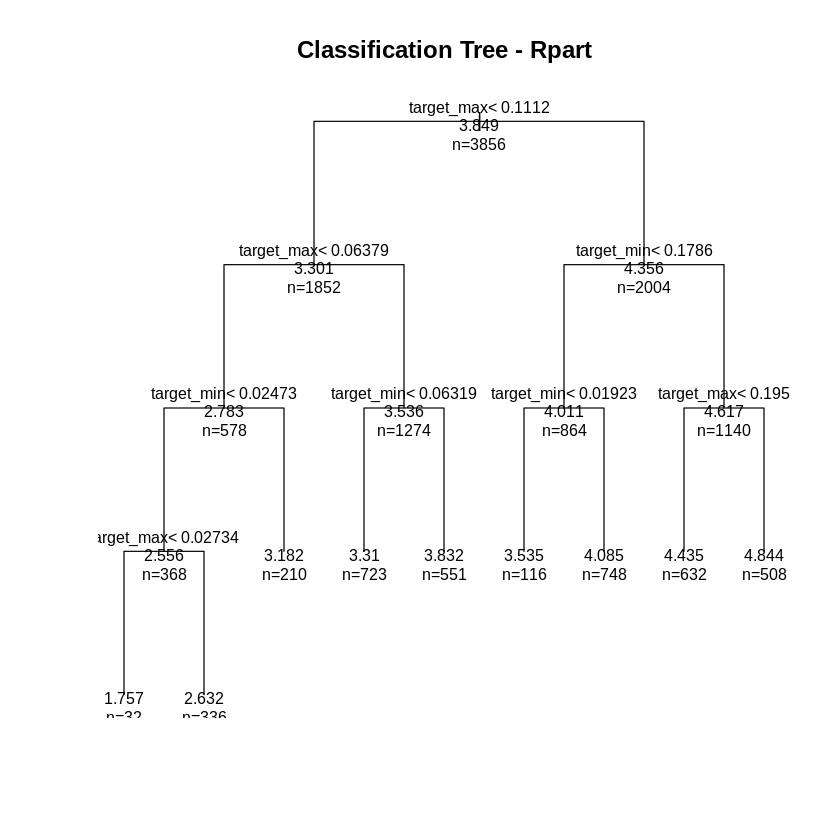

In [53]:
plot(model, uniform=TRUE,
   main="Classification Tree - Rpart")
text(model, use.n=TRUE, all=TRUE, cex=.8)

Now, we create an ensemble of models composed R = 100 decisions trees

In [54]:
R<-100
size_CV <-floor(N/CV_folds)
CV_rmse_ensemble<-numeric(CV_folds)
CV_nmse_ensemble<-numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

    # The predictions of each individual model is stored as
    # a column of the Y_hat_ts_ensemble matrix
     Y_hat_ts_ensemble <- matrix(0,nrow=nrow(X_ts),ncol=R)

     for (r in 1:R) {
         idx_tr_resample <- sample(idx_tr,rep=T)
         X_tr<-X_features_selected[idx_tr_resample,]
         Y_tr<-Y[idx_tr_resample]

         DS<-cbind(X_tr,target=Y_tr)

         # Model fit (using rpart function)
         model<- rpart(target~.,DS)

         # Storing prediction for the r^th model
         Y_hat_ts_ensemble[,r]<- exp(predict(model,X_ts))
         #Y_hat_ts_ensemble[,r]<- exp(Y_hat_ts_ensemble[,r])

     }

     #Computing ensemble prediction (via model averaging)
     Y_hat_ts<-apply(Y_hat_ts_ensemble,1,mean)

     # Computation of CV RMSE
     CV_rmse_ensemble[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     # Computation of CV NRMSE
     CV_nmse_ensemble[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
     }

print(paste("CV rmse=",round(mean(CV_rmse_ensemble),digits=4), " ; std dev=",round(sd(CV_rmse_ensemble),digits=4)))
print(paste("CV nmse=",round(mean(CV_nmse_ensemble),digits=4), " ; std dev=",round(sd(CV_nmse_ensemble),digits=4)))

CV_rmse_rpart_ensemble_model <- CV_rmse_ensemble
CV_nmse_rpart_ensemble_model <- CV_nmse_ensemble

[1] "CV rmse= 19.2411  ; std dev= 6.6671"
[1] "CV nmse= 0.2374  ; std dev= 0.0923"


The CV rmse error is lower with 100 decisions trees than with a single tree-based model.

In [55]:
mean(CV_rmse_rpart_ensemble_model) < mean(CV_rmse_rpart_single_model)

[1] TRUE

# 3. Random Forest

In [56]:
CV_folds <- 10
R<-10
size_CV <-floor(N/CV_folds)
CV_rmse_ensemble<-numeric(CV_folds)
CV_nmse_ensemble<-numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

    # The predictions of each individual model is stored as
    # a column of the Y_hat_ts_ensemble matrix
     Y_hat_ts_ensemble <- matrix(0,nrow=nrow(X_ts),ncol=R)

     for (r in 1:R) {
         idx_tr_resample <- sample(idx_tr,rep=T)
         X_tr<-X_features_selected[idx_tr_resample,]
         Y_tr<-Y[idx_tr_resample]

         DS<-cbind(X_tr,target=Y_tr)


         model <- randomForest(target~., DS, ntree=r)
         # Storing prediction for the r^th model
         Y_hat_ts_ensemble[,r]<- exp(predict(model,X_ts))
     }

     #Computing ensemble prediction (via model averaging)
     Y_hat_ts<-apply(Y_hat_ts_ensemble,1,mean)

     # Computation of CV RMSE
     CV_rmse_ensemble[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     # Computation of CV NRMSE
     CV_nmse_ensemble[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
     }

print(paste("CV rmse=",round(mean(CV_rmse_ensemble),digits=4), " ; std dev=",round(sd(CV_rmse_ensemble),digits=4)))
print(paste("CV nmse=",round(mean(CV_nmse_ensemble),digits=4), " ; std dev=",round(sd(CV_nmse_ensemble),digits=4)))

CV_rmse_rpart_ensemble_model <- CV_rmse_ensemble
CV_nmse_rpart_ensemble_model <- CV_nmse_ensemble

[1] "CV rmse= 16.037  ; std dev= 5.8678"
[1] "CV nmse= 0.168  ; std dev= 0.0804"


# 4. Support Vector Machines

In [93]:
size_CV <-floor(N/CV_folds)

CV_rmse_svm<-numeric(CV_folds)
CV_nmse_svm<-numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)

     # Model fit (using lm function)
     model<- svm(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)

     # Cross validation error = Root Mean Squared Error
     CV_rmse_svm[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_svm[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
}


print(paste("CV RMSE=",round(mean(CV_rmse_svm),digits=4), " ; std dev=",round(sd(CV_rmse_svm),digits=4)))
print(paste("CV NMSE=",round(mean(CV_nmse_svm),digits=4), " ; std dev=",round(sd(CV_nmse_svm),digits=4)))


[1] "CV RMSE= 19.6204  ; std dev= 7.0837"
[1] "CV NMSE= 0.2498  ; std dev= 0.1094"


# 5. Gradient-boosted trees

Adaptive boosting is a ensemble learning algorithm used for both classification and regression tasks. It works by combining multiple weak learners (models that perform slightly better than random chance) to create a strong classifier or regressor. The idea of combining multiple learners is to reduce the variance of the model. To implement this learning algorithm, we used the package "adabag" which is not listed in the section 5 of the project instructions.

In [87]:
install.packages("xgboost")
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [92]:
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_rmse_xgboost<-numeric(CV_folds)
CV_nmse_xgboost<-numeric(CV_folds)
for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)
     # Initialize the XGBoost regressor
     xgb <- xgboost(data = as.matrix(X_tr),
               label = Y_tr,
               max_depth = 3,
               eta = 0.1,
               nrounds = 100,
               objective = "reg:squarederror")

     # Model prediction
     Y_hat_ts<- predict(xgb, as.matrix(X_ts))
     Y_hat_ts<-exp(Y_hat_ts)

     # Cross validation error = RMSE
     CV_rmse_xgboost[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_xgboost[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
}

print(paste("CV RMSE=",round(mean(CV_rmse_xgboost),digits=4), " ; std dev=",round(sd(CV_rmse_xgboost),digits=4)))
print(paste("CV NMSE=",round(mean(CV_nmse_xgboost),digits=4), " ; std dev=",round(sd(CV_nmse_xgboost),digits=4)))

[1]	train-rmse:3.115239 
[2]	train-rmse:2.808177 
[3]	train-rmse:2.532094 
[4]	train-rmse:2.283709 
[5]	train-rmse:2.060289 
[6]	train-rmse:1.859482 
[7]	train-rmse:1.679069 
[8]	train-rmse:1.516900 
[9]	train-rmse:1.371222 
[10]	train-rmse:1.240746 
[11]	train-rmse:1.123606 
[12]	train-rmse:1.018653 
[13]	train-rmse:0.924611 
[14]	train-rmse:0.840633 
[15]	train-rmse:0.765721 
[16]	train-rmse:0.698778 
[17]	train-rmse:0.639303 
[18]	train-rmse:0.586400 
[19]	train-rmse:0.539341 
[20]	train-rmse:0.497918 
[21]	train-rmse:0.461451 
[22]	train-rmse:0.429431 
[23]	train-rmse:0.401273 
[24]	train-rmse:0.376849 
[25]	train-rmse:0.355767 
[26]	train-rmse:0.337279 
[27]	train-rmse:0.321362 
[28]	train-rmse:0.307874 
[29]	train-rmse:0.295750 
[30]	train-rmse:0.285778 
[31]	train-rmse:0.277185 
[32]	train-rmse:0.269812 
[33]	train-rmse:0.263771 
[34]	train-rmse:0.258579 
[35]	train-rmse:0.254252 
[36]	train-rmse:0.250583 
[37]	train-rmse:0.247375 
[38]	train-rmse:0.244255 
[39]	train-rmse:0.241

# Comparison of the performance of the models

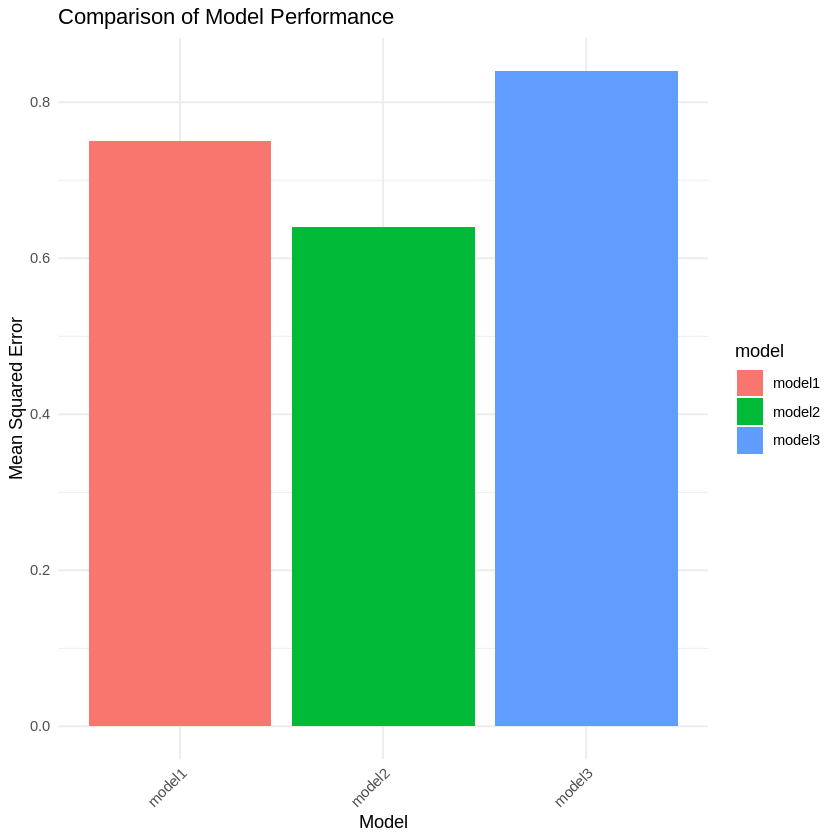

In [1]:
# List of vectors containing mean squared errors for different models
mse_list <- list(Linear model = ,
                 model2 = c(0.08, 0.12, 0.18, 0.1, 0.16),
                 model3 = c(0.12, 0.17, 0.22, 0.14, 0.19))

# Create a data frame from the MSE list
mse_df <- data.frame(model = rep(names(mse_list), sapply(mse_list, length)),
                     mse = unlist(mse_list))

# Plotting
library(ggplot2)

# Plot mean squared errors
ggplot(mse_df, aes(x = model, y = mse, fill = model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of Model Performance",
       x = "Model",
       y = "Mean Squared Error") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
